<a href="https://colab.research.google.com/github/seuhihihi/Colab-Python/blob/main/Box%E2%80%93Behnken%E5%AE%9E%E9%AA%8C%E8%AE%BE%E8%AE%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Temperature  FlowRate  SampleSize  ParticleSize  ExperimentID
0          480       100         100           200             1
1          600       100         100           200             2
2          480       300         100           200             3
3          600       300         100           200             4
4          480       200          50           200             5
                     sum_sq    df          F        PR(>F)
C(Temperature)   114.550654   2.0  69.027019  3.613911e-09
C(FlowRate)        0.335888   2.0   0.202403  8.185996e-01
C(SampleSize)      0.180932   2.0   0.109028  8.972931e-01
C(ParticleSize)    2.312302   2.0   1.393369  2.737635e-01
Residual          14.935541  18.0        NaN           NaN


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32858 (\N{CJK UNIFIED IDEOGRAPH-805A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31867 (\N{CJK UNIFIED IDEOGRAPH-7C7B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 31034 (\N{CJK UNIFIED IDEOGRAPH-793A}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22522 (\N{CJK UNIFIED IDEOGRAPH-57FA}) missing from font(s) DejaVu Sans.
  fig.canvas

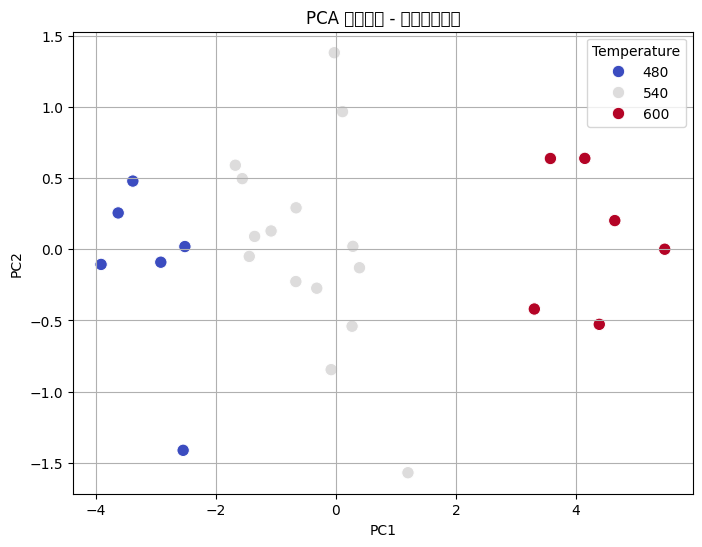

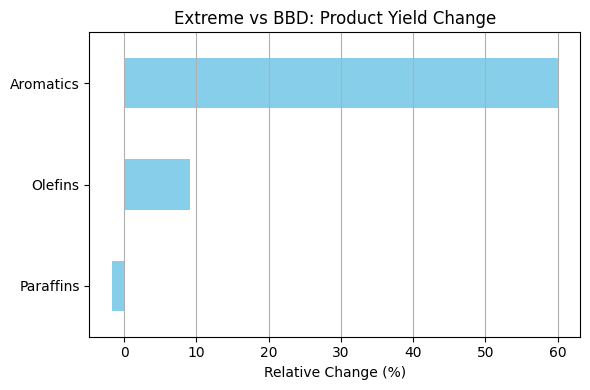

In [4]:
!pip install pyDOE2 pandas numpy matplotlib seaborn scikit-learn statsmodels

from pyDOE2 import bbdesign
import pandas as pd

# 4个因素，每个3个水平（BBD 默认编码为 -1, 0, 1）
design = bbdesign(4, center=3)
columns = ['Temperature', 'FlowRate', 'SampleSize', 'ParticleSize']

# 转换为实际水平（单位可自行替换）
levels = {
    'Temperature': [480, 540, 600],
    'FlowRate': [100, 200, 300],
    'SampleSize': [50, 100, 150],
    'ParticleSize': [100, 200, 400]  # 中心粒径用整数表示
}

df = pd.DataFrame(design, columns=columns)
for col in columns:
    df[col] = df[col].map({-1: levels[col][0], 0: levels[col][1], 1: levels[col][2]})

df['ExperimentID'] = range(1, len(df)+1)
print(df.head())

import numpy as np
from statsmodels.formula.api import ols
import statsmodels.api as sm

np.random.seed(42)
df['Olefins'] = 10 + 0.05 * df['Temperature'] + np.random.normal(0, 1, len(df))

model = ols('Olefins ~ C(Temperature) + C(FlowRate) + C(SampleSize) + C(ParticleSize)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 模拟多类产物数据（化学类别）
np.random.seed(0)
df['Paraffins'] = 5 + 0.02 * df['Temperature'] + np.random.normal(0, 0.5, len(df))
df['Diolefins'] = 3 + 0.03 * df['Temperature'] + np.random.normal(0, 0.5, len(df))
df['Aromatics'] = 0.3 + 0.001 * df['Temperature'] + np.random.normal(0, 0.05, len(df))

features = ['Olefins', 'Paraffins', 'Diolefins', 'Aromatics']
X = df[features]

# PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)
df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='PC1', y='PC2', hue='Temperature', palette='coolwarm', s=80)
plt.title('PCA 聚类图示 - 基于产物类别')
plt.grid(True)
plt.show()

# 示例：对某个化合物类别在极端条件 vs 正常条件下的变化
bbd_yield = pd.Series({'Olefins': 22.0, 'Paraffins': 5.8, 'Aromatics': 0.3})
extreme_yield = pd.Series({'Olefins': 24.0, 'Paraffins': 5.7, 'Aromatics': 0.48})

rel_change = ((extreme_yield - bbd_yield) / bbd_yield) * 100

# 可视化
rel_change.sort_values().plot(kind='barh', color='skyblue', figsize=(6,4))
plt.xlabel('Relative Change (%)')
plt.title('Extreme vs BBD: Product Yield Change')
plt.grid(axis='x')
plt.tight_layout()
plt.show()



# New Section